<a href="https://colab.research.google.com/github/ketakishirgave-visuals/codsoft_taskno/blob/main/movies2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genres       10 non-null     object 
 1   director     10 non-null     object 
 2   actors       10 non-null     object 
 3   budget       10 non-null     int64  
 4   imdb_rating  10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes
None
   genres director actors     budget  imdb_rating
0  Action    James    Tom  100000000          7.5
1  Comedy    Linda   Emma   20000000          6.0
2   Drama    James    Tom   10000000          8.0
3  Action    Linda   Emma  150000000          7.8
4  Comedy    James    Tom   30000000          6.5

Columns available:
Index(['genres', 'director', 'actors', 'budget', 'imdb_rating'], dtype='object')

Cleaned data sample:
  primary_genre director actors     budget  imdb_rating
0        Action    James    Tom

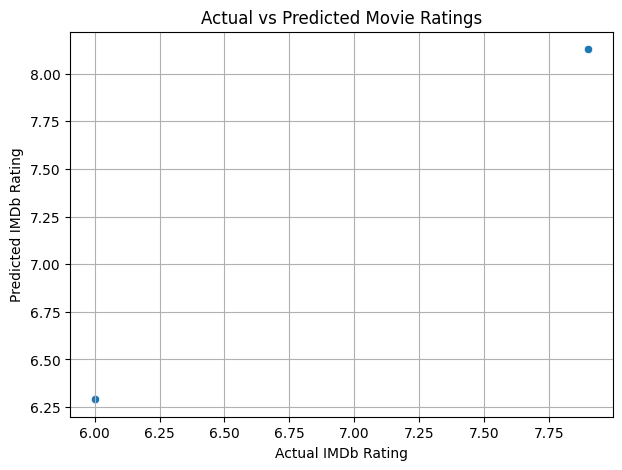


📈 Model Evaluation:
Mean Squared Error (MSE): 0.07
R² Score: 0.92

🔍 Prediction vs Actual Ratings:

   Actual  Predicted
0     7.9   8.128065
1     6.0   6.291281


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


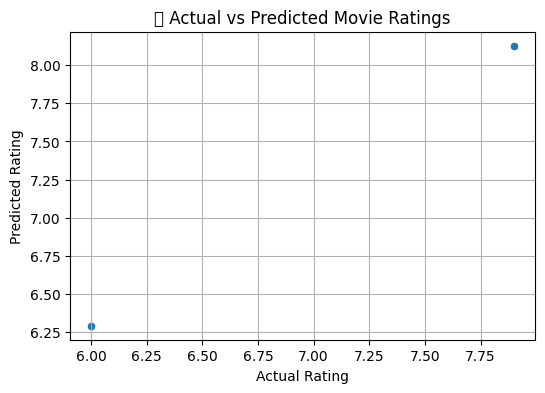

In [16]:
#ketaki
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('IMDb_movies.csv')

#
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())




print("\nColumns available:")
print(df.columns)

df['primary_genre'] = df['genres'].str.split('|').str[0]


df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

if 'budget' in df.columns:
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
else:
    df['budget'] = np.nan

df_clean = df.dropna(subset=['imdb_rating', 'primary_genre', 'director', 'actors'])

median_budget = df_clean['budget'].median()
df_clean['budget'] = df_clean['budget'].fillna(median_budget)

print("\nCleaned data sample:")
print(df_clean[['primary_genre', 'director', 'actors', 'budget', 'imdb_rating']].head())

X = df_clean[['primary_genre', 'director', 'actors', 'budget']]
y = df_clean['imdb_rating']


categorical_features = ['primary_genre', 'director', 'actors']
numerical_features = ['budget']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nModel performance on test set:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPrediction vs Actual (sample):")
print(result_df.head(10))

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs Predicted Movie Ratings')
plt.grid(True)
plt.show()


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\n🔍 Prediction vs Actual Ratings:\n")
print(result_df)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('🎬 Actual vs Predicted Movie Ratings')
plt.grid(True)
plt.show()